In [27]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

style.use('ggplot')

In [2]:
data = pd.read_csv('student-mat.csv', sep=';')

In [3]:
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
data

predict = 'G3'

In [20]:
X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [24]:
best_trained_model = 0

# finding a model with the heighest accuracy
'''for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    accuracy = linear.score(x_test, y_test)
    
    print(accuracy)

    if accuracy > best_trained_model:
        best_trained_model = accuracy
        
        # saving the model
        with open('studentmodel.picle', 'wb') as file:
            pickle.dump(linear, file)'''

# reading a model and saving it into linear var
pickle_in = open('studentmodel.picle', 'rb')
linear = pickle.load(pickle_in)


In [25]:
# coefficients in the 5 dimensional space and the intercept
print(f'{linear.coef_}, {linear.intercept_}')


[ 0.13899391  0.99721836 -0.1607434  -0.14932114  0.04429564], -1.6729516763875782


In [26]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

14.610014392524826 [13 15  3  0  0] 15
12.632016842003813 [13 13  4  0  4] 12
6.064077891106111 [7 7 3 0 6] 7
-0.743493270897493 [9 0 2 0 0] 0
8.568485862617596 [ 7 10  4  1  2] 10
12.81450973305486 [12 13  2  0  4] 13
11.640108798674309 [12 12  2  0  0] 11
9.21836311530597 [10 10  2  1  0] 0
7.487813513679249 [ 7  8  2  0 12] 8
9.317281626876477 [ 9 10  2  0  2] 9
13.912533345037737 [14 14  2  0  0] 14
6.275223918099857 [8 7 2 0 4] 6
18.684967636465473 [19 18  2  0  2] 18
4.002799371736428 [6 5 2 0 4] 6
10.592487812125835 [11 11  2  0  2] 11
6.113515797883784 [ 7  6  2  0 26] 6
12.155217346766614 [12 12  1  0  8] 12
6.25267776427494 [7 7 1 0 3] 8
10.021786712470826 [11 10  1  0  8] 10
9.544866825577358 [10 10  2  0  4] 11
9.04619744919219 [10 10  4  0  0] 10
15.42565691857733 [16 15  3  0  9] 16
5.898144563418465 [ 8  6  2  0 18] 7
10.592487812125835 [11 11  2  0  2] 10
4.457178069457065 [ 6  5  1  1 14] 5
18.43563294827289 [19 18  3  0  0] 19
10.880011161517258 [10 11  1  0  8] 10
4.

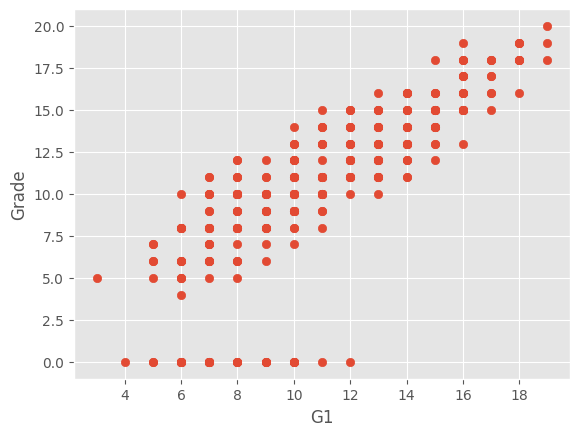

In [28]:
p = 'G1'
plt.scatter(data[p], data['G3'])
plt.xlabel(p)
plt.ylabel('Grade')
plt.show()